# K-means discretization

* Definition 
  * Applying k-means clustering to the continuous variable 
  
* Process (E.g. age to 5 clusters)
  * 1) Initialization: random creation of K centers 
  * 2) Each data point is associated with the closest cluster 
  * 3) Each center point is re-computed as the center of its associated points 
  * Repeat 2) and 3) until convergence is reached. The algorithm minimizes the pairwise squared deviations of points within the same cluster 
  * Sort values into clusters 
  
* Summary 
  * Does not imporve value spread 
  * Handle outliers, although outliers may have an influence in the centroid 
  * Creates discrete variable 
  * Good to combine with categorical encodings 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
df = pd.read_csv('../data/house_price/train.csv', index_col='Id')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), 
                                                    df['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)

In [4]:
num_cols = X_train.select_dtypes('number').columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [5]:
X_train[num_cols].isnull().mean()

MSSubClass       0.000000
LotFrontage      0.184932
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
MasVnrArea       0.004892
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageYrBlt      0.052838
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
dtype: float64

In [6]:
cols = ['1stFlrSF', 'GrLivArea']

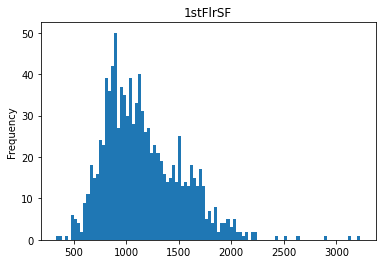

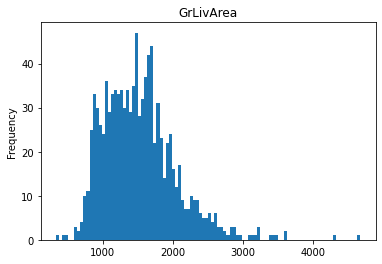

In [7]:
for col in cols:
    X_train[col].plot.hist(bins=100)
    plt.title(col)
    plt.show()

In [8]:
disc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
disc.fit(X_train[cols])

KBinsDiscretizer(encode='ordinal', strategy='kmeans')

In [9]:
disc.bin_edges_

array([array([ 334.        ,  940.29644269, 1254.76570048, 1603.88445454,
       2299.51368159, 3228.        ]),
       array([ 334.        , 1181.48226062, 1603.20845024, 2113.1162481 ,
       2945.96825397, 4676.        ])], dtype=object)

In [10]:
train_t = pd.DataFrame(disc.transform(X_train[cols]), columns=cols)
test_t = pd.DataFrame(disc.transform(X_test[cols]), columns=cols)

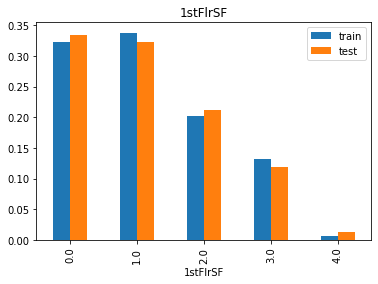

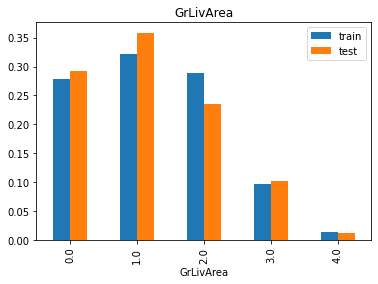

In [11]:
for col in cols:
    t1 = train_t.groupby([col])[col].count()/len(train_t)
    t2 = test_t.groupby([col])[col].count()/len(test_t)
    
    temp = pd.concat([t1, t2], axis=1, keys=cols)
    temp.plot.bar()
    plt.legend(['train', 'test'])
    plt.title(col)
    plt.show()